In [103]:
import keras
from keras.datasets import mnist
from keras.layers import Activation, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.utils import np_utils

In [104]:
def lr_schedule(epoch):
    lrate=0.0001
    if epoch > 75:
        lrate=0.0005
    if epoch > 100:
        lrate=0.0003
    return lrate

In [105]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [106]:
#z-score - normalization
mean=np.mean(xtrain,axis=(0,1,2))
std=np.std(xtrain,axis=(0,1,2))
xtrain=(xtrain-mean)/(std+1e-7)
xtest=(xtest-mean)/(std+1e-7)

xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],xtrain.shape[2], 1))
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],xtrain.shape[2],1))
xtrain.shape,ytrain.shape

((60000, 28, 28, 1), (60000,))

In [107]:
model=Sequential()       

In [108]:
weight_decay=1e-4
num_classes=10
ytrain=np_utils.to_categorical(ytrain,num_classes)
ytest=np_utils.to_categorical(ytest,num_classes)

In [109]:
model.add(Conv2D(32,(3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay),input_shape=xtrain.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()
#"I'm travelling to USA in June this year provided my visa gets renewed ......"

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)       

In [110]:
datagen=ImageDataGenerator(rotation_range=90,vertical_flip=True, horizontal_flip=True)
datagen.fit(xtrain)

In [120]:
#training

batch_size=64
opt_rms=keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=opt_rms, metrics=['accuracy'])



In [ ]:
model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),steps_per_epoch=xtrain.shape[0] // batch_size,epochs=36,verbose=1)


In [118]:
model_json=model.to_json()
with open('/Users/NagarajuGooty/Downloads/model.json', 'w') as f:
    f.write(model_json)
model.save_weights('model.h5')



In [122]:
#testing
scores=model.evaluate(xtest, ytest,batch_size=128,verbose=1)
print('\n Test Result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

((10000, 28, 28, 1), (10000,))

In [115]:
import matplotlib.pyplot as plt

def show_images(X):
    plt.figure(1)
    k=0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow((X[k]))
            k+=1
    plt.show()

(10000, 28, 28)


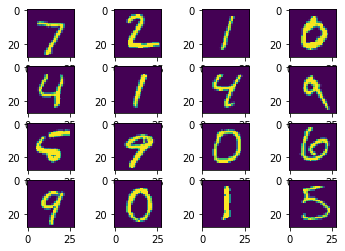

['Seven', 'Five', 'One', 'zero', 'Four', 'One', 'Four', 'Nine', 'Seven', 'Nine', 'zero', 'Six', 'Nine', 'zero', 'One', 'Three']


array([7, 5, 1, 0, 4, 1, 4, 9, 7, 9, 0, 6, 9, 0, 1, 3])

In [116]:

(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

#z-score - normalization
mean=np.mean(xtrain,axis=(0,1,2))
std=np.std(xtrain,axis=(0,1,2))
xtrain=(xtrain-mean)/(std+1e-7)
xtest=(xtest-mean)/(std+1e-7)

print(xtest.shape)

show_images(xtest[:16])

xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],xtrain.shape[2], 1))
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],xtrain.shape[2],1))
xtrain.shape,ytrain.shape

json_file=open('/Users/NagarajuGooty/Downloads/model.json','r')
loaded_model=json_file.read()
json_file.close()

from keras.models import model_from_json
model=model_from_json(loaded_model)
model.load_weights('model.h5')

labels=['zero','One','Two,','Three','Four','Five','Six','Seven','Eight','Nine']

indices=np.argmax(model.predict(xtest[:16]),1)

print([labels[x] for x in indices])

indices

